### **CNN with attention mechanisms used for Alzheimer's disease classification**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import random 
import cv2

import keras
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid
from keras import layers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import initializers
from keras.models import Sequential

#### **Data Preprocessing**

In [ ]:
train_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
test_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"

In [ ]:
train_batches = ImageDataGenerator(validation_split=0.1) \
                .flow_from_directory(directory=train_path,  
                                     classes = ['NonDemented', 'VeryMildDemented', 
                                                'MildDemented', 'ModerateDemented'], 
                                     subset='training',
                                     batch_size=10)

validation_batches = ImageDataGenerator(validation_split=0.1) \
                     .flow_from_directory(directory=train_path, 
                                          classes = ['NonDemented', 'VeryMildDemented', 
                                                     'MildDemented', 'ModerateDemented'], 
                                          subset='validation',
                                          batch_size=10)
                
test_batches = ImageDataGenerator() \
                    .flow_from_directory(directory=test_path, 
                                         classes = ['NonDemented', 'VeryMildDemented', 
                                                    'MildDemented', 'ModerateDemented'], 
                                         batch_size=10, 
                                         shuffle=False)

Found 4610 images belonging to 4 classes.
Found 511 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


<BarContainer object of 4 artists>

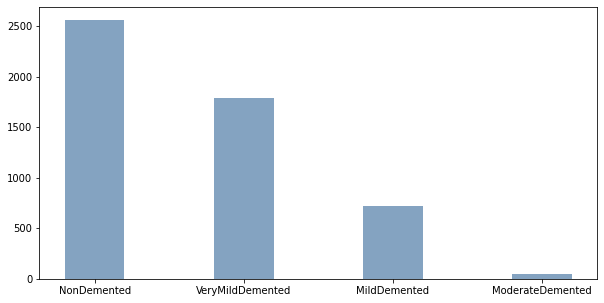

In [ ]:
data = {'NonDemented':      0, 
        'VeryMildDemented': 0, 
        'MildDemented':     0,
        'ModerateDemented': 0}

for cls in os.listdir(train_path):
    for img in os.listdir(train_path + '/' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(keys, values, color=(0.2, 0.4, 0.6, 0.6), width = 0.4)

#### **Simple CNN model implementation**


In [ ]:
IMG_SIZE = 224
n_classes = 4

model = Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),
                    layers.Rescaling(1./255),
                    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                                  padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3)),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=128, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=256, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Flatten(),
                    layers.Dense(300, activation='relu'),
                    layers.Dense(150, activation='relu'),
                    layers.Dropout(0.25),
                    layers.Dense(n_classes, activation='softmax')])

In [ ]:
METRICS = [keras.metrics.CategoricalAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=METRICS)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 16

In [ ]:
history = model.fit(x=train_batches,
                    validation_data=validation_batches,
                    steps_per_epoch=len(train_batches),
                    validation_steps=len(validation_batches),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE, 
                    verbose=2)

2022-06-08 20:16:46.044900: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-06-08 20:16:51.603180: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
461/461 - 30s - loss: 1.1729 - accuracy: 0.5386 - precision: 0.5838 - recall: 0.4451 - auc: 0.8041 - val_loss: 0.9829 - val_accuracy: 0.5597 - val_precision: 0.5950 - val_recall: 0.5088 - val_auc: 0.8432
Epoch 2/50
461/461 - 11s - loss: 0.6379 - accuracy: 0.7228 - precision: 0.7653 - recall: 0.6620 - auc: 0.9270 - val_loss: 0.6082 - val_accuracy: 0.7280 - val_precision: 0.7820 - val_recall: 0.6810 - val_auc: 0.9370
Epoch 3/50
461/461 - 12s - loss: 0.2649 - accuracy: 0.9022 - precision: 0.9165 - recall: 0.8933 - auc: 0.9886 - val_loss: 0.4692 - val_accuracy: 0.8180 - val_precision: 0.8212 - val_recall: 0.8180 - val_auc: 0.9647
Epoch 4/50
461/461 - 11s - loss: 0.0833 - accuracy: 0.9725 - precision: 0.9816 - recall: 0.9716 - auc: 0.9992 - val_loss: 0.2046 - val_accuracy: 0.9119 - val_precision: 0.9259 - val_recall: 0.9041 - val_auc: 0.9931
Epoch 5/50
461/461 - 11s - loss: 0.0493 - accuracy: 0.9848 - precision: 0.9923 - recall: 0.9818 - auc: 0.9997 - val_loss: 0.2616 - val_accur

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, None)    0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, None)    0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      2

In [ ]:
def plot_loss(history, n):
    plt.semilogy(history.epoch, history.history['loss'], label='Train')
    plt.semilogy(history.epoch, history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

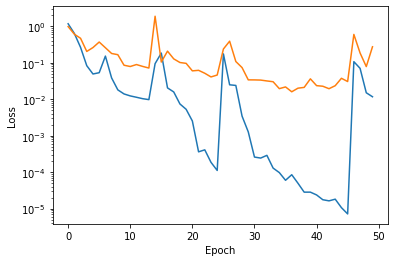

In [ ]:
plot_loss(history, 0)

In [ ]:
results = model.evaluate(test_batches, verbose=0)

for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

loss :  1.5782445669174194
accuracy :  0.6724002957344055
precision :  0.6742722392082214
recall :  0.6700547337532043
auc :  0.8643700480461121


#### **Addition of attention mechanisms**

##### 1. Channel Attention: ECA-Net 

In [ ]:
def ECA(x):
    k_size = 3 
    squeeze = tf.reduce_mean(x,(2,3),keepdims=False)
    squeeze = tf.expand_dims(squeeze, axis=1)
    attn = layers.Conv1D(filters=1,
    kernel_size=k_size,
    padding='same',
    kernel_initializer='random_normal',
    use_bias=False)(squeeze)

    attn = tf.expand_dims(tf.transpose(attn, [0, 2, 1]), 3)
    attn = tf.math.sigmoid(attn)
    scale = x * attn
    return x * attn

In [ ]:
IMG_SIZE = 224
n_classes = 4

inp = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x1 = layers.Resizing(IMG_SIZE, IMG_SIZE)(inp)
x2 = layers.Rescaling(1./255)(x1)
x3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3))(x2)
x4 = ECA(x3)
x5 = layers.BatchNormalization(axis=-1)(x4)
x6 = layers.MaxPool2D(pool_size=(2, 2))(x5)
x7 = layers.Conv2D(filters=64, kernel_size=(3, 3), 
                   activation='relu', padding = 'same')(x6)
x8 = ECA(x7)
x9 = layers.BatchNormalization(axis=-1)(x8)
x10 = layers.MaxPool2D(pool_size=(2, 2))(x9)
x11 = layers.Conv2D(filters=128, kernel_size=(3, 3), 
                    activation='relu', padding = 'same')(x10)
x12 = ECA(x11)
x13 = layers.BatchNormalization(axis=-1)(x12)
x14 = layers.MaxPool2D(pool_size=(2, 2))(x13)
x15 = layers.Conv2D(filters=256, kernel_size=(3, 3), 
                      activation='relu', padding = 'same')(x14)
x16 = ECA(x15)
x17 = layers.BatchNormalization(axis=-1)(x16)
x18 = layers.MaxPool2D(pool_size=(2, 2))(x17)
y1 = layers.Flatten()(x18)
y2 = layers.Dense(300, activation='relu')(y1)
y3 = layers.Dense(150, activation='relu')(y2)
y4 = layers.Dropout(0.25)(y3)
y = layers.Dense(n_classes, activation='softmax')(y4)   


model_ECA = tf.keras.Model(inp, y)

In [ ]:
model_ECA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=METRICS)

In [ ]:
history_ECA = model_ECA.fit(x=train_batches,
                            validation_data=validation_batches,
                            steps_per_epoch=len(train_batches),
                            validation_steps=len(validation_batches),
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE, 
                            verbose=2)

Epoch 1/50
461/461 - 15s - loss: 1.2348 - accuracy: 0.5563 - precision: 0.5880 - recall: 0.4868 - auc: 0.8113 - val_loss: 1.6230 - val_accuracy: 0.5225 - val_precision: 0.5236 - val_recall: 0.5205 - val_auc: 0.7851
Epoch 2/50
461/461 - 13s - loss: 0.7674 - accuracy: 0.6479 - precision: 0.7212 - recall: 0.5371 - auc: 0.8919 - val_loss: 0.8599 - val_accuracy: 0.5753 - val_precision: 0.6187 - val_recall: 0.5049 - val_auc: 0.8741
Epoch 3/50
461/461 - 12s - loss: 0.3886 - accuracy: 0.8436 - precision: 0.8706 - recall: 0.8176 - auc: 0.9745 - val_loss: 0.3964 - val_accuracy: 0.8180 - val_precision: 0.8416 - val_recall: 0.8004 - val_auc: 0.9707
Epoch 4/50
461/461 - 13s - loss: 0.1197 - accuracy: 0.9588 - precision: 0.9705 - recall: 0.9560 - auc: 0.9981 - val_loss: 0.3111 - val_accuracy: 0.8611 - val_precision: 0.8780 - val_recall: 0.8454 - val_auc: 0.9823
Epoch 5/50
461/461 - 12s - loss: 0.0366 - accuracy: 0.9861 - precision: 0.9961 - recall: 0.9855 - auc: 0.9999 - val_loss: 0.1561 - val_accur

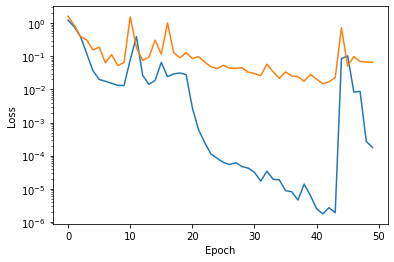

In [ ]:
plot_loss(history_ECA, 0)

In [ ]:
results = model_ECA.evaluate(test_batches, verbose=0)

for name, value in zip(model_ECA.metrics_names, results):
    print(name, ': ', value)

loss :  2.07873797416687
accuracy :  0.7114933729171753
precision :  0.7112675905227661
recall :  0.7107114791870117
auc :  0.8609598278999329


##### 2. Channel & Spatial Attention: CBAM 

In [ ]:
def cbam_block(cbam_feature, ratio=8):
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    channel = input_feature.shape[channel_axis]
    
    shared_layer_one = Dense(channel//ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    
    avg_pool = GlobalAveragePooling2D()(input_feature)    
    avg_pool = Reshape((1,1,channel))(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel)
    
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    assert max_pool.shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    assert max_pool.shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    assert max_pool.shape[1:] == (1,1,channel)
    
    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    
    if K.image_data_format() == "channels_first":
        channel = input_feature.shape[1]
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = input_feature.shape[-1]
        cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    assert avg_pool.shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    assert max_pool.shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat.shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat)	
    assert cbam_feature.shape[-1] == 1
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

In [ ]:
IMG_SIZE = 224
n_classes = 4

inp = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x1 = layers.Resizing(IMG_SIZE, IMG_SIZE)(inp)
x2 = layers.Rescaling(1./255)(x1)
x3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3))(x2)
x4 = cbam_block(x3)
x5 = layers.BatchNormalization(axis=-1)(x4)
x6 = layers.MaxPool2D(pool_size=(2, 2))(x5)
x7 = layers.Conv2D(filters=64, kernel_size=(3, 3), 
                   activation='relu', padding = 'same')(x6)
x8 = cbam_block(x7)
x9 = layers.BatchNormalization(axis=-1)(x8)
x10 = layers.MaxPool2D(pool_size=(2, 2))(x9)
x11 = layers.Conv2D(filters=128, kernel_size=(3, 3), 
                    activation='relu', padding = 'same')(x10)
x12 = cbam_block(x11)
x13 = layers.BatchNormalization(axis=-1)(x12)
x14 = layers.MaxPool2D(pool_size=(2, 2))(x13)
x15 = layers.Conv2D(filters=256, kernel_size=(3, 3), 
                      activation='relu', padding = 'same')(x14)
x16 = cbam_block(x15)
x17 = layers.BatchNormalization(axis=-1)(x16)
x18 = layers.MaxPool2D(pool_size=(2, 2))(x17)
y1 = layers.Flatten()(x18)
y2 = layers.Dense(300, activation='relu')(y1)
y3 = layers.Dense(150, activation='relu')(y2)
y4 = layers.Dropout(0.25)(y3)
y = layers.Dense(n_classes, activation='softmax')(y4)   


model_CBAM = tf.keras.Model(inp, y)

In [ ]:
model_CBAM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                   loss='categorical_crossentropy', 
                   metrics=METRICS)

In [ ]:
history_CBAM = model_CBAM.fit(x=train_batches,
                              validation_data=validation_batches,
                              steps_per_epoch=len(train_batches),
                              validation_steps=len(validation_batches),
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE, 
                              verbose=2)

Epoch 1/50
461/461 - 28s - loss: 1.0471 - accuracy: 0.5841 - precision: 0.6283 - recall: 0.5186 - auc: 0.8325 - val_loss: 5.3722 - val_accuracy: 0.5010 - val_precision: 0.5010 - val_recall: 0.5010 - val_auc: 0.6673
Epoch 2/50
461/461 - 24s - loss: 0.6944 - accuracy: 0.6931 - precision: 0.7346 - recall: 0.6323 - auc: 0.9129 - val_loss: 1.0201 - val_accuracy: 0.5656 - val_precision: 0.6022 - val_recall: 0.5245 - val_auc: 0.8497
Epoch 3/50
461/461 - 24s - loss: 0.4162 - accuracy: 0.8349 - precision: 0.8550 - recall: 0.8121 - auc: 0.9688 - val_loss: 0.5410 - val_accuracy: 0.7789 - val_precision: 0.7979 - val_recall: 0.7573 - val_auc: 0.9498
Epoch 4/50
461/461 - 24s - loss: 0.1873 - accuracy: 0.9330 - precision: 0.9402 - recall: 0.9269 - auc: 0.9936 - val_loss: 0.3292 - val_accuracy: 0.8630 - val_precision: 0.8851 - val_recall: 0.8591 - val_auc: 0.9809
Epoch 5/50
461/461 - 24s - loss: 0.1133 - accuracy: 0.9627 - precision: 0.9658 - recall: 0.9612 - auc: 0.9974 - val_loss: 0.2964 - val_accur

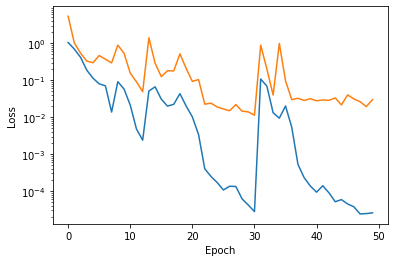

In [ ]:
plot_loss(history_CBAM, 0)

In [ ]:
results = model_CBAM.evaluate(test_batches, verbose=0)

for name, value in zip(model_CBAM.metrics_names, results):
    print(name, ': ', value)

loss :  1.892707109451294
accuracy :  0.7310398817062378
precision :  0.7319748997688293
recall :  0.7302579879760742
auc :  0.8769052028656006


#### **Results visualization using GradCAM** 

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):
        gradModel = tf.keras.Model(
        inputs=[self.model.inputs],
        outputs=[self.model.get_layer(self.layerName).output,
                 self.model.output])
        
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        
        grads = tape.gradient(loss, convOutputs)
        
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        image = np.asarray(image, np.float64)
        heatmap = np.asarray(heatmap, np.float64)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        return (heatmap, output)

In [ ]:
def show_heatmap(model, img_path):
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    i = np.argmax(preds[0])
    label_to_class = {'NonDemented': 0,
                      'VeryMildDemented': 1,
                      'MildDemented': 2,
                      'ModerateDemented': 3}

    class_to_label = {v: k for k, v in label_to_class.items()}

    label = class_to_label[i]
    print(f'Predicted class: {label} | Prediction probability: {max(preds[0]) * 100}%')
    
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    (heatmap, output) = cam.overlay_heatmap(heatmap, image[0], alpha=0.5)
    
    output = output.astype(np.uint8)
    plt.imshow(output, interpolation='nearest')
    plt.show()

##### Testing on a random image using all of the three models: 

Predicted class: MildDemented | Prediction probability: 99.98804330825806%


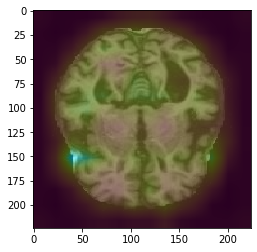

In [ ]:
img_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
show_heatmap(model, img_path)

Predicted class: MildDemented | Prediction probability: 99.79795813560486%


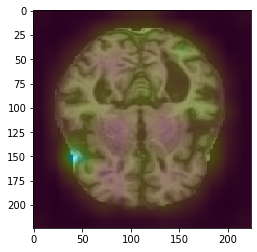

In [ ]:
img_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
show_heatmap(model_ECA, img_path)

Predicted class: VeryMildDemented | Prediction probability: 96.05648517608643%


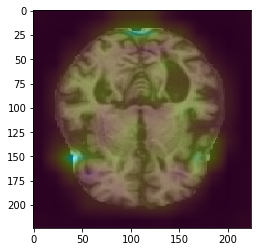

In [ ]:
img_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
show_heatmap(model_CBAM, img_path)